/Users/Binod/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


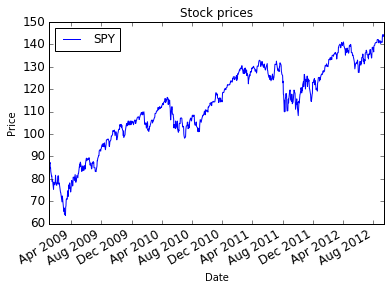

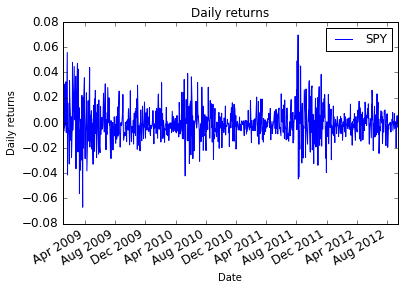

mean =  -0.000456411849998
Standard Deviation =  0.0133989633891


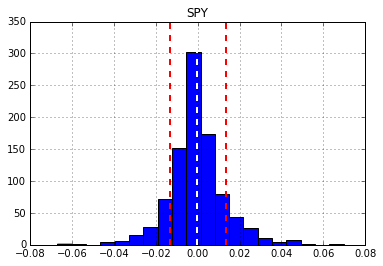

SPY    3.246248
dtype: float64


In [1]:
"""Plot a histogram"""
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline





def test_run():
    #read data
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)
    plot_data(df)def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "data/{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date",parse_dates=True,usecols=['Date',
                                                                'Adj Close'],na_values=['nan'])
        
        
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df = df.join(df_temp)
        df = df.dropna()

    return df

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    #return df.pct_change(1)
    daily_returns = df.copy() # copy df to match size and cloumn
    daily_returns[1:] = df[:-1].values / df[1:] - 1
    daily_returns.ix[0,:] = 0 # set row 0 to 0
    return daily_returns

    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    #plot histogram
    daily_returns.hist(bins = 20)
    
    #mean and standard deviation
    mean = daily_returns['SPY'].mean()
    print "mean = ",mean
    std  = daily_returns['SPY'].std()
    print "Standard Deviation = ",std
    
    #plot mean in histogram graph
    plt.axvline(mean,color="w",linestyle="dashed",linewidth=2)
    
    #plot stdandar deviation in histogram graph
    plt.axvline(std,color='r',linestyle = "dashed", linewidth = 2)
    plt.axvline(-std,color='r',linestyle = "dashed", linewidth = 2)
    
    plt.show()
    
    
    #Kurtosis
    print daily_returns.kurtosis()

    
    
    
    
    
if __name__ == "__main__":
    test_run()


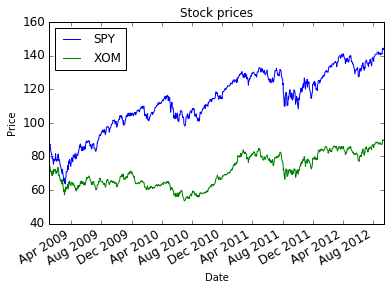

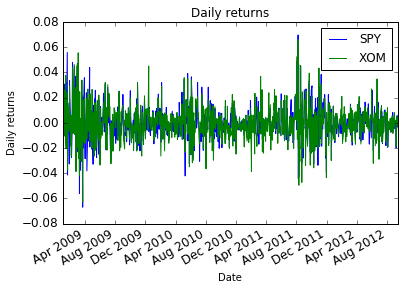

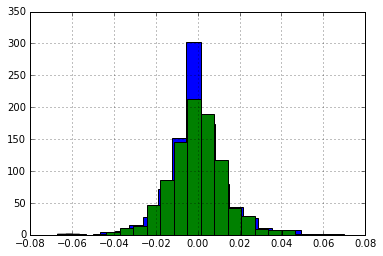

In [17]:
"""Plot two  histogram together"""
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline



def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "data/{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date",parse_dates=True,usecols=['Date',
                                                                'Adj Close'],na_values=['nan'])
        
        
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df = df.join(df_temp)
        df = df.dropna()

    return df

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    #return df.pct_change(1)
    daily_returns = df.copy() # copy df to match size and cloumn
    daily_returns[1:] = df[:-1].values / df[1:] - 1
    daily_returns.ix[0,:] = 0 # set row 0 to 0
    return daily_returns


def test_run():
    #read data
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    #plot histogram
    daily_returns["SPY"].hist(bins = 20)
    daily_returns["XOM"].hist(bins = 20)
    
    """
    #mean and standard deviation
    mean = daily_returns['SPY'].mean()
    print "mean = ",mean
    std  = daily_returns['SPY'].std()
    print "Standard Deviation = ",std
    
    #plot mean in histogram graph
    plt.axvline(mean,color="w",linestyle="dashed",linewidth=2)
    
    #plot stdandar deviation in histogram graph
    plt.axvline(std,color='r',linestyle = "dashed", linewidth = 2)
    plt.axvline(-std,color='r',linestyle = "dashed", linewidth = 2)"""
    
    plt.show()
    
    """ 
    #Kurtosis
    print daily_returns.kurtosis()
    """
    
    
    
    
    
if __name__ == "__main__":
    test_run()


beta XOM =  0.851508942548
alpha XOM =  0.000287153718948


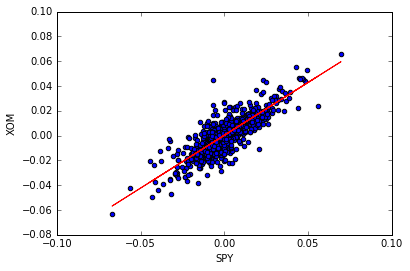

alpha GLD =  -0.000616473295342
beta GLD =  0.0607499375551


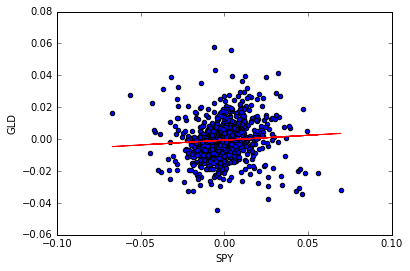

          SPY       XOM       GLD
SPY  1.000000  0.821433  0.068348
XOM  0.821433  1.000000  0.071542
GLD  0.068348  0.071542  1.000000


In [22]:
"""Plot two  histogram together"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline



def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "data/{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        # TODO: Read and join data for each symbol
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date",parse_dates=True,usecols=['Date',
                                                                'Adj Close'],na_values=['nan'])
        
        
        df_temp = df_temp.rename(columns = {'Adj Close' : symbol})
        df = df.join(df_temp)
        df = df.dropna()

    return df

def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    #return df.pct_change(1)
    daily_returns = df.copy() # copy df to match size and cloumn
    daily_returns[1:] = df[:-1].values / df[1:] - 1
    daily_returns.ix[0,:] = 0 # set row 0 to 0
    return daily_returns


def test_run():
    #read data
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY','XOM','GLD']
    df = get_data(symbols, dates)
    #plot_data(df)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    #plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    #plot Scatter spy vs XOM
    daily_returns.plot(kind = 'scatter', x = 'SPY', y = 'XOM')
    beta_XOM, alpha_XOM = np.polyfit(daily_returns['SPY'],daily_returns['XOM'],1)
    print "beta XOM = ",beta_XOM
    print "alpha XOM = ",alpha_XOM
    plt.plot(daily_returns['SPY'], beta_XOM*daily_returns['SPY']+ alpha_XOM, '-', color = 'r')
    plt.show()
    
    
    daily_returns.plot(kind = 'scatter', x = 'SPY', y = 'GLD')
    beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'],daily_returns['GLD'],1)
    print "alpha GLD = ",alpha_GLD
    print "beta GLD = ",beta_GLD
    plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY']+ alpha_GLD, '-', color = 'r')
    plt.show()
    
    """ 
    #Kurtosis
    print daily_returns.kurtosis()
    """
    
    print daily_returns.corr(method='pearson')
    
    
    
    
if __name__ == "__main__":
    test_run()


In [4]:
import datetime as dt

def compute_portfolio_stats(prices, allocs=[0.1,0.2,0.3,0.4], rfr = 0.0, sf = 252.0):
    normed = prices / prices.ix[0]
    alloced = normed * allocs
    port_vals = alloced.sum(axis = 1)
    daily_rets = compute_daily_returns(port_vals)
    cr = port_vals[-1] / port_vals[0] - 1
    adr = daily_rets.mean()
    sddr = daily_rets.std()
    sr = (daily_rets - rfr).mean() / (daily_rets).std() * np.sqrt(sf)
    
    return cr, adr, sddr, sr

def assess_portfolio(sd = dt.datetime(2008,1,1), ed = dt.datetime(2009,1,1), \
    syms = ['GOOG','AAPL','GLD','XOM'], \
    allocs=[0.1,0.2,0.3,0.4], \
    sv=1000000, rfr=0.0, sf=252.0, \
    gen_plot=False):

    # Read in adjusted closing prices for given symbols, date range
    dates = pd.date_range(sd, ed)
    prices_all = get_data(syms, dates)  # automatically adds SPY
    prices = prices_all[syms]  # only portfolio symbols
    prices_SPY = prices_all['SPY']  # only SPY, for comparison later

    # Get daily portfolio value
    
    prices_SPY = prices_SPY / prices_SPY[0]    
    normed = prices / prices.ix[0]
    alloced = normed * allocs
    pos_vals = alloced * sv
    port_vals = pos_vals.sum(axis = 1)

    # Get portfolio statistics (note: std_daily_ret = volatility)
    cr, adr, sddr, sr = compute_portfolio_stats(prices, allocs, rfr, sf)

    # Compare daily portfolio value with SPY using a normalized plot
    if gen_plot:
        # add code to plot here
        df_temp = pd.concat([port_vals/sv, prices_SPY], keys=['Portfolio', 'SPY'], axis=1)
        plot_data(df_temp)
        pass

    # Add code here to properly compute end value
    ev = sv * (1 + cr)
    return cr, adr, sddr, sr, ev



ValueError: Wrong number of items passed 4, placement implies 5